##  -: Exploratory Data Analysis Case Project :-

In [1]:
# Firt we will import all the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now we will read the Dataset from local.
app_data = pd.read_csv("application_data.csv")
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Finding the shape of the Dataset.
app_data.shape

(307511, 122)

In [4]:
barecol = app_data.isnull().sum()
barecol = barecol[barecol.values>(0.3*len(barecol))]
len(barecol)

64

In [5]:
barecol = list(barecol[barecol.values>=0.3].index)
app_data.drop(labels = barecol,axis = 1, inplace = True)
print(len(barecol))

64


In [6]:
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


**So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values**

**Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, 
Hence Median comes to rescue for this and we will fill those missing banks with median value**

In [7]:
vals=app_data['AMT_ANNUITY'].median()

app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=vals

In [8]:
# Searching for the column for null values

app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

**Now, all columns have been with zero null values**

In [9]:
# Removing rows having null values greater than or equal to 30%

barerow=app_data.isnull().sum(axis=1)
barerow=list(barerow[barerow.values>=0.3*len(app_data)].index)
app_data.drop(labels=barerow,axis=0,inplace=True)
print(len(barerow))

0


In [10]:
# We will remove unwanted columns from this dataset

undesired=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=undesired,axis=1,inplace=True)

**There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.**

In [11]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column

app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 28)

In [12]:
# For Organization column

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

**So, there are 4 rows from Gender column and 55374 rows from Organization type column**

In [13]:
# Describing the Gender column to check the number of females and males

app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.**

In [14]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [15]:
# Describing the organization type column

app_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

**So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.**

In [16]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [17]:
num_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
app_data[num_cols]=app_data[num_cols].apply(pd.to_numeric)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


## DERIVED METRICS

**Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'**

In [18]:
## Now we create bins for the Income Amount.

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [19]:
## Creating bins for Credit Amount.
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

In [20]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

Tar0_app_data=app_data.loc[app_data["TARGET"]==0]
Tar1_app_data=app_data.loc[app_data["TARGET"]==1]


In [21]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(Tar0_app_data)/len(Tar1_app_data),2)

10.55

**The Imbalance ratio is 10.55**

****Univariate analysis for categories****

****Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)****

In [22]:
# Count plotting in logarithmic scale

def UNIPLOT(app_data,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 22
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 31
  
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(app_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=40)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = app_data, x= col, order=app_data[col].value_counts().index,hue = hue,palette='rocket_r') 
        
    plt.show()

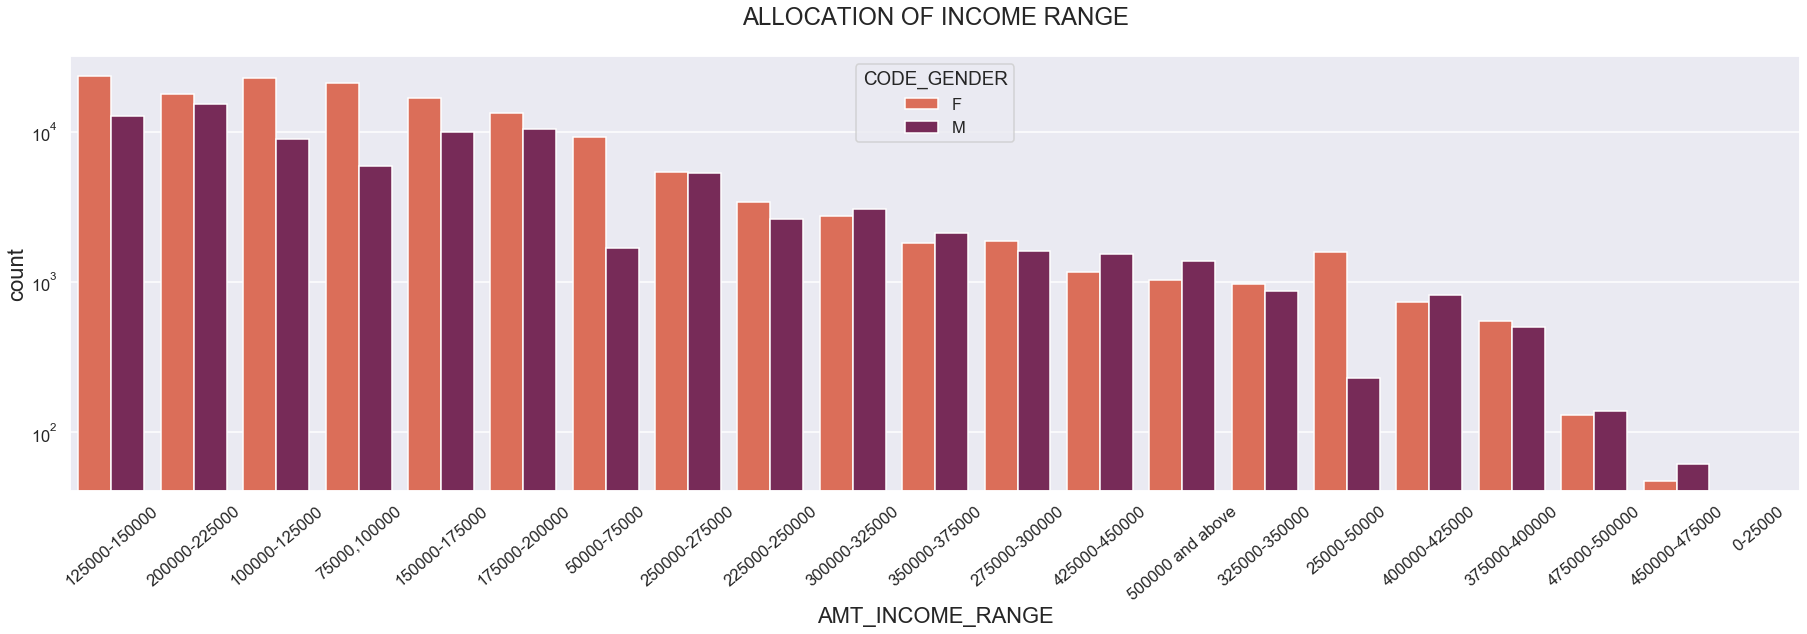

In [23]:
# PLotting for income range

UNIPLOT(Tar0_app_data,col='AMT_INCOME_RANGE',title='ALLOCATION OF INCOME RANGE',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. Female counts are higher than male.
2. This graph show that females are more than male in having credits for that range.
3. Income range from 100000 to 200000 is having more number of credits.
4. Very less count for income range 400000 and above.
5. Also, in some ranges Males counts is higher(400000 - 425000).

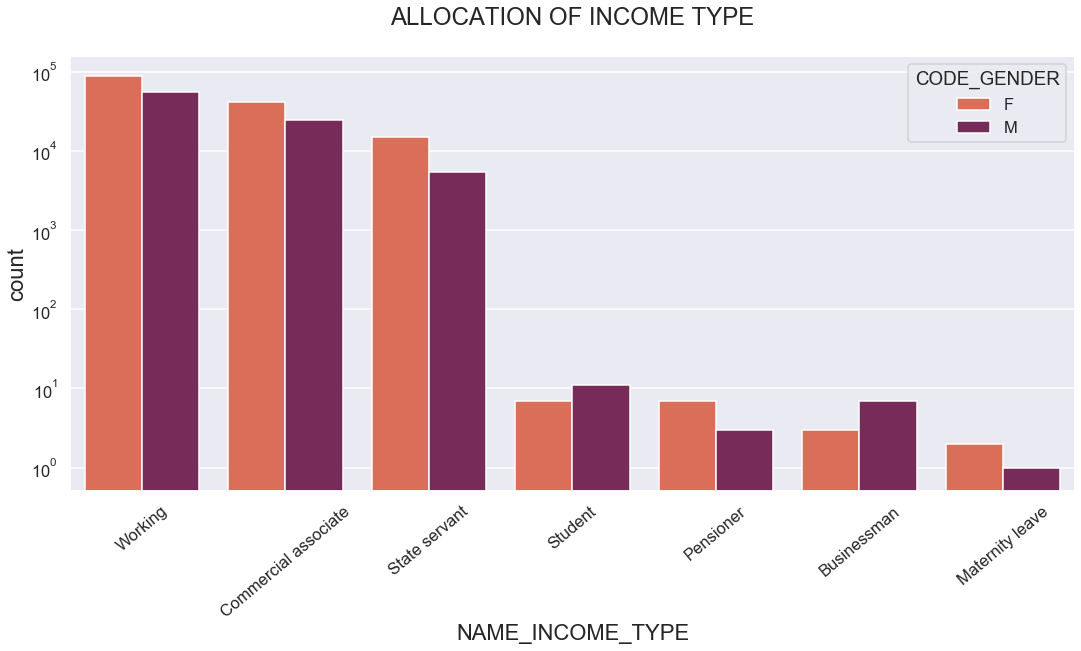

In [24]:
UNIPLOT(Tar0_app_data,col='NAME_INCOME_TYPE',title='ALLOCATION OF INCOME TYPE',hue='CODE_GENDER')


**Points to be concluded from the above graph.**

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Maternity leave have least incomes.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.**

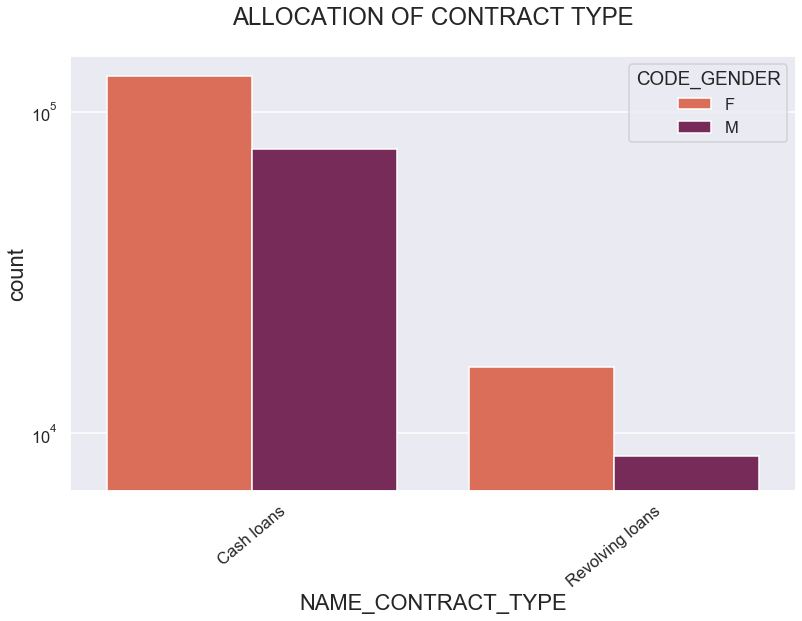

In [25]:
# Plotting for Contract type

UNIPLOT(Tar0_app_data,col='NAME_CONTRACT_TYPE',title='ALLOCATION OF CONTRACT TYPE',hue='CODE_GENDER')


**Points to be concluded from the above graph.**

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. Females have higher count in cash loans.
2. For this also Female is leading for applying credits.


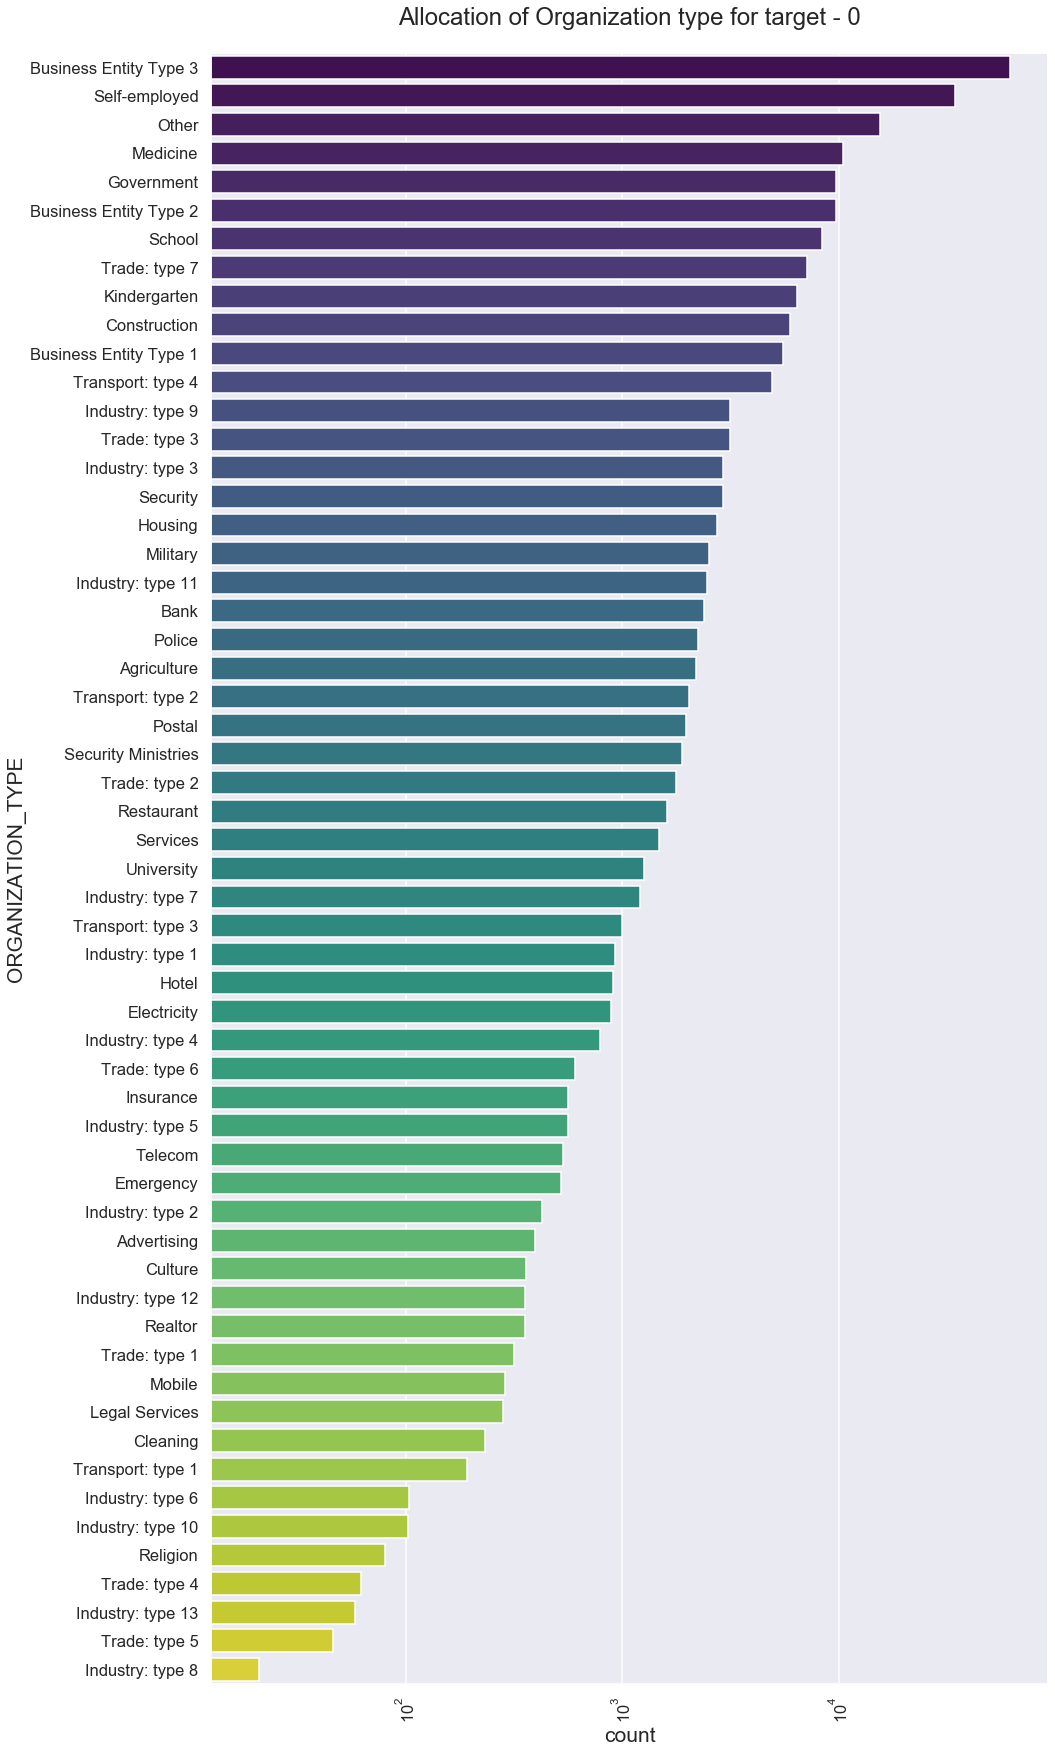

In [26]:
# Plotting for Organization type in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 28

plt.title("Allocation of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=Tar0_app_data,y='ORGANIZATION_TYPE',order=Tar0_app_data['ORGANIZATION_TYPE'].value_counts().index,palette='viridis')

plt.show()

**Points to be concluded from the above graph.**

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Industry: type 8 has least counts.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4

**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

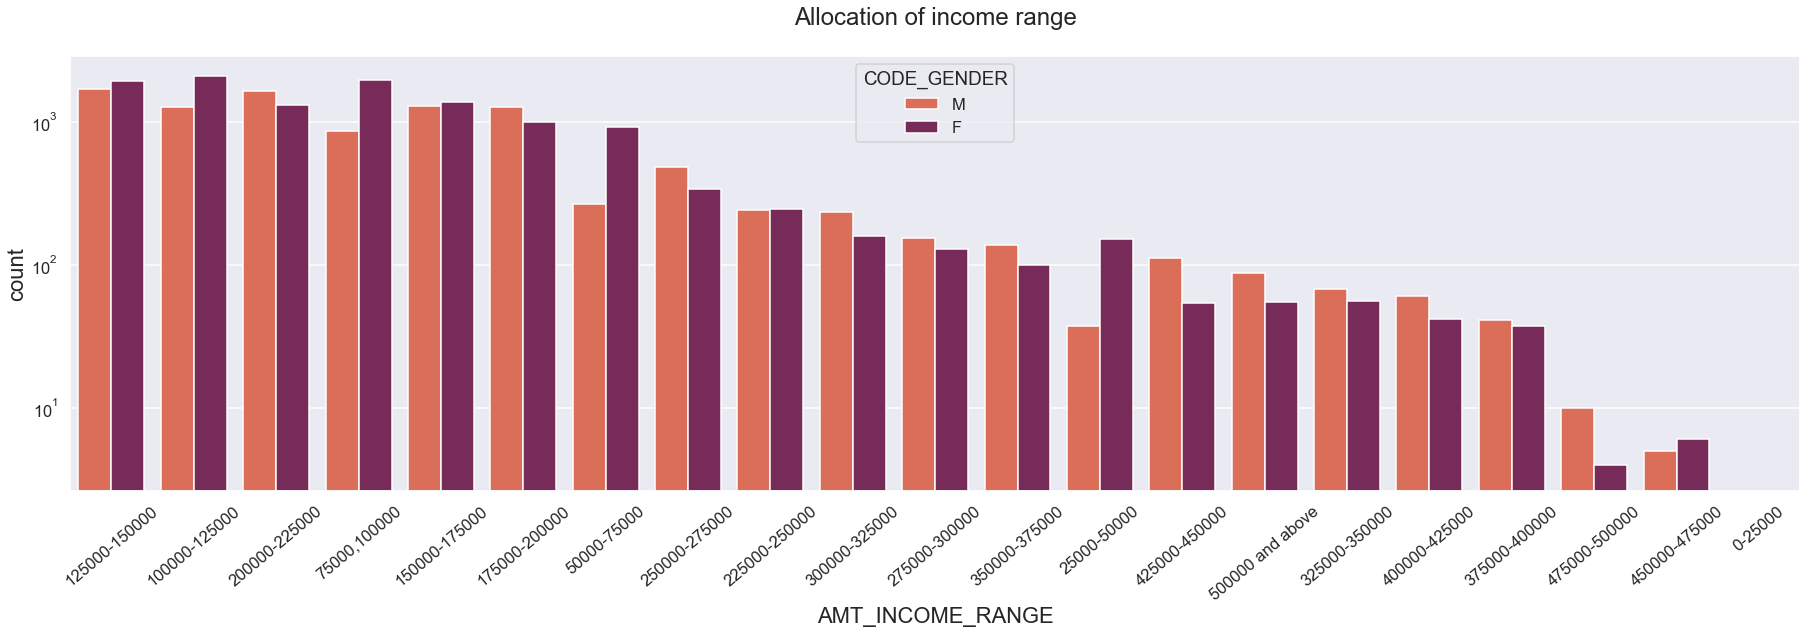

In [27]:
# PLotting for income range

UNIPLOT(Tar1_app_data,col='AMT_INCOME_RANGE',title='Allocation of income range',hue='CODE_GENDER')


**Points to be concluded from the above graph.**

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. Very less count for income range 400000 and above.

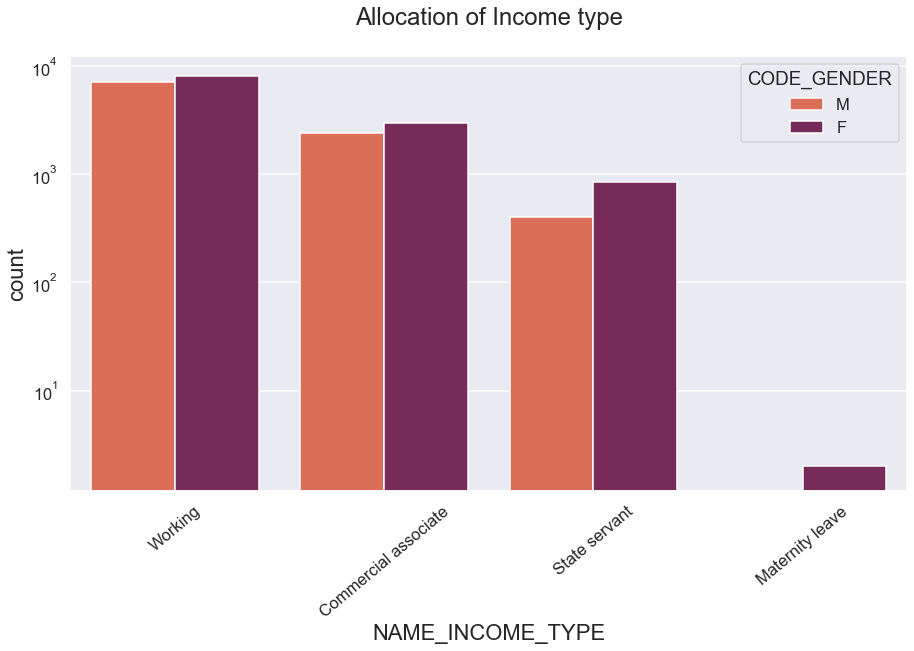

In [28]:
UNIPLOT(Tar1_app_data,col='NAME_INCOME_TYPE',title='Allocation of Income type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Maternity leave have less number of credits for income types.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

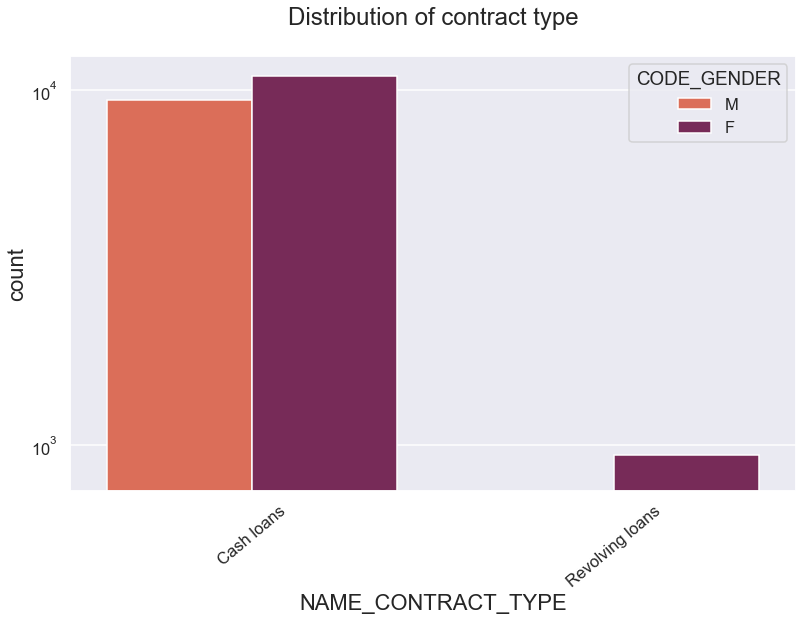

In [29]:
# Plotting for Contract type

UNIPLOT(Tar1_app_data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

**Points to be concluded from the above graph.**

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
4. No Males counts in Revolving loans
3. For type 1 have only Female Revolving loans.

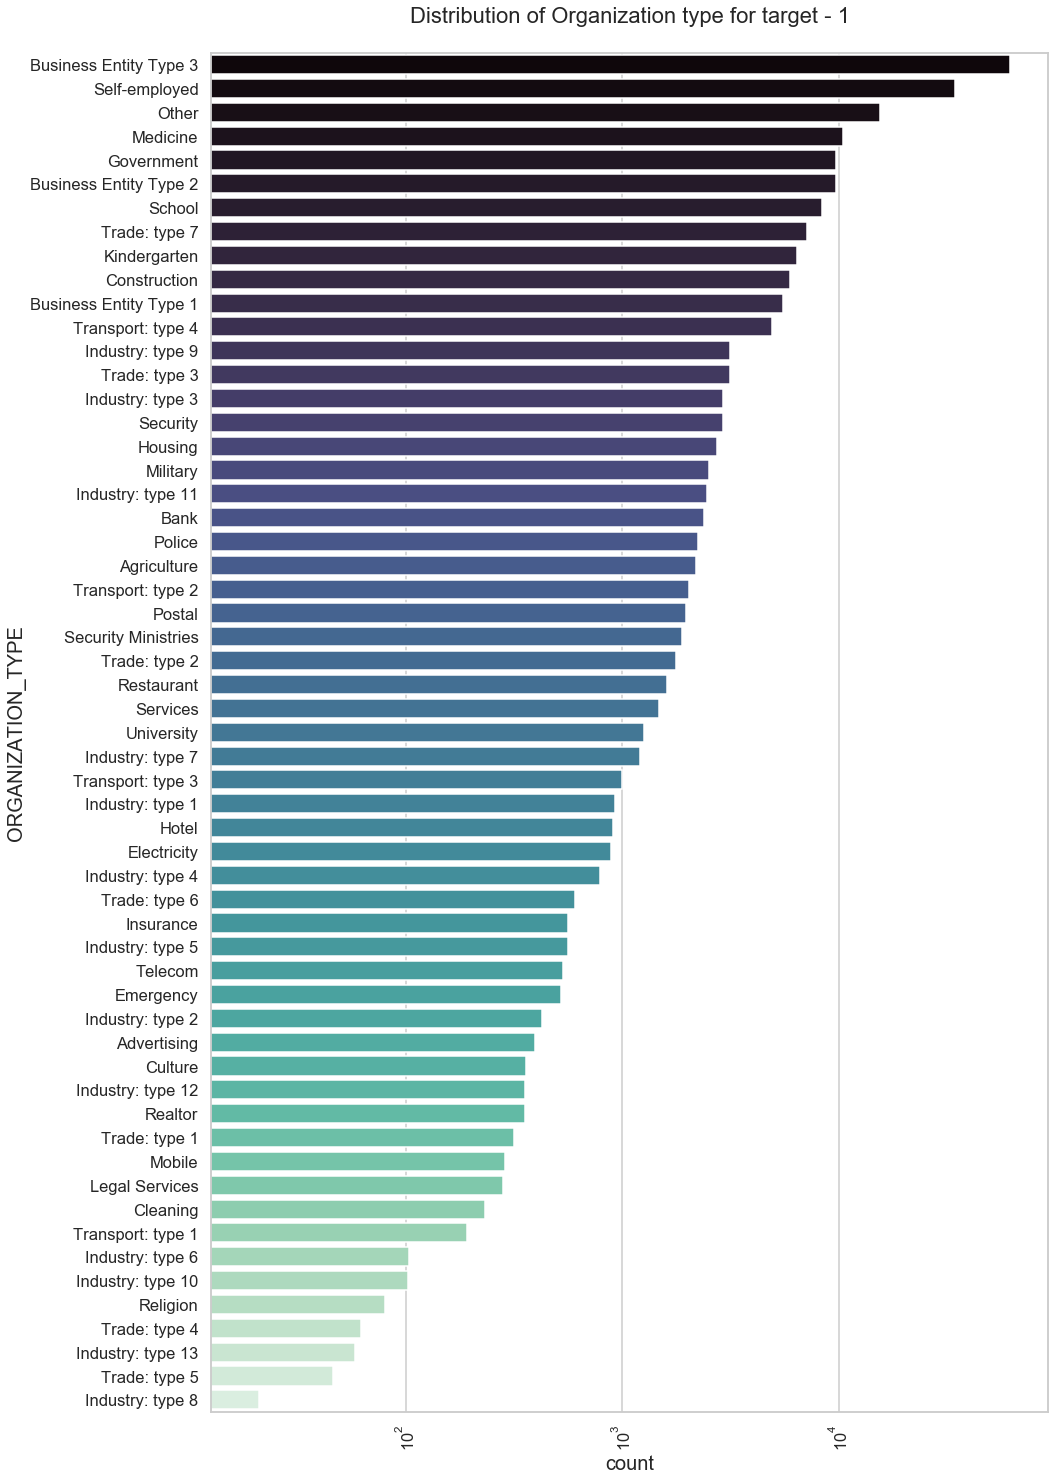

In [30]:

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,25))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=Tar0_app_data,y='ORGANIZATION_TYPE',order=Tar0_app_data['ORGANIZATION_TYPE'].value_counts().index,palette='mako')

plt.show()

**Points to be concluded from the above graph.**

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Second least is Trade: type 5
3. Same as type 0 in distribution of organization type.


In [31]:
# Finding some correlation for numerical columns for both target 0 and 1 

Tar0_corr=Tar0_app_data.iloc[0:,2:]
Tar1_corr=Tar1_app_data.iloc[0:,2:]

Tar0=Tar0_corr.corr(method='spearman')
Tar1=Tar1_corr.corr(method='spearman')

In [32]:
Tar0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [33]:
# Correlation for target 1

Tar1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [34]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def Tar_corr(data,title):
    plt.figure(figsize=(13, 8))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 30

# heatmap with a color map of choice


    sns.heatmap(data,cmap = "RdBu",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

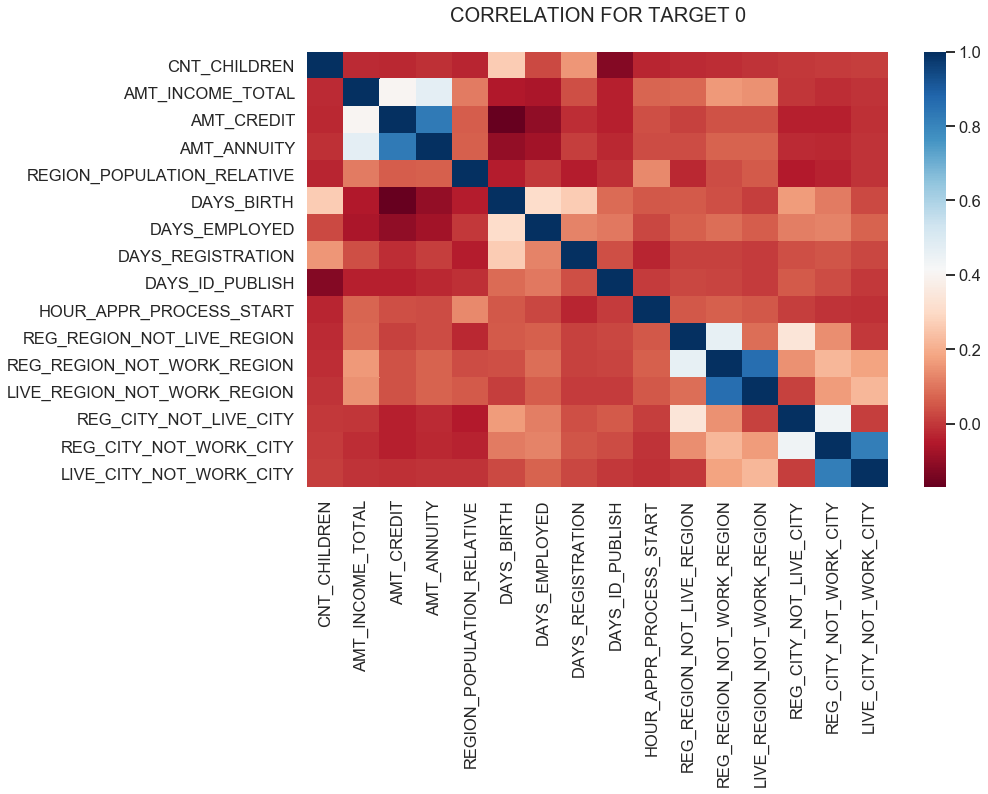

In [35]:
Tar_corr(data=Tar0,title='CORRELATION FOR TARGET 0')

**As we can see from above correlation heatmap, There are number of observation we can point out**

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is higher to densely populated area.
3. The income is also higher in densely populated area.

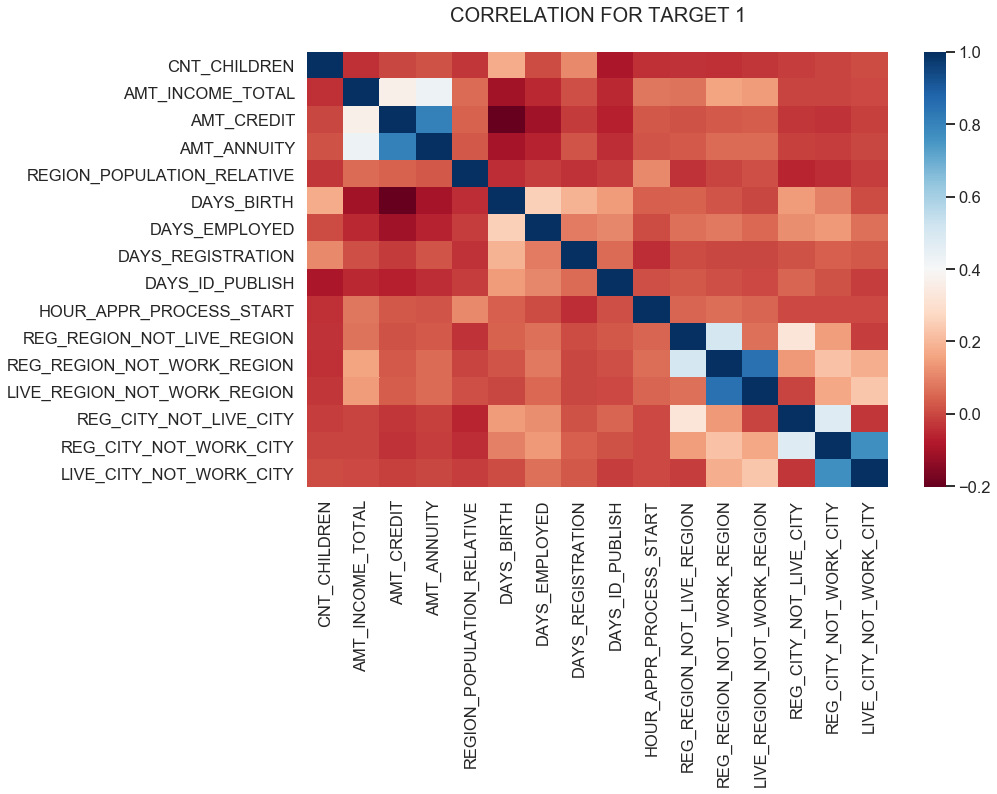

In [36]:
Tar_corr(data=Tar1,title='CORRELATION FOR TARGET 1')

**This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are The client's permanent address does not match contact address are having less children and vice-versa**


**NOW WE WILL DO UNIVARIATE ANALYSIS FOR VARIABLES...**

In [37]:

def uni_num(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.figure(figsize=(8,5))
    plt.rcParams["axes.labelsize"] = 21
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 28
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =Tar1_app_data ,x=col,orient='v')
    plt.show()

**FINDING OUTLIERS FOR TARGET - 0**

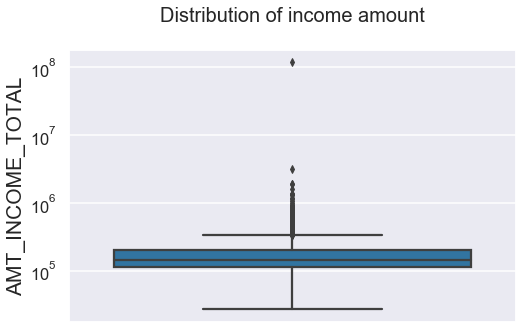

In [38]:
# Distribution of income amount

uni_num(data=Tar0_app_data,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

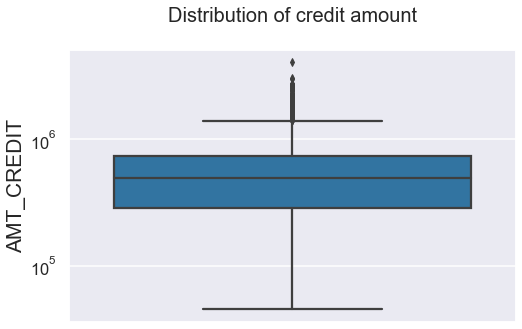

In [39]:
# Disrtibution of credit amount

uni_num(data=Tar0_app_data,col='AMT_CREDIT',title='Distribution of credit amount')

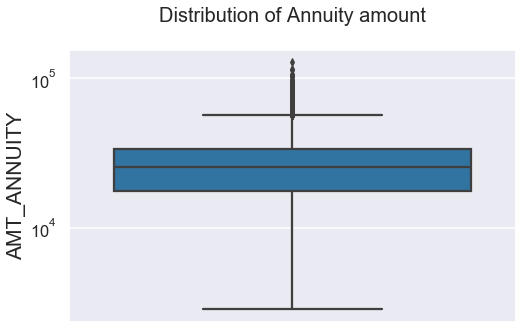

In [40]:
# Distribution of anuuity amount

uni_num(data=Tar0_app_data,col='AMT_ANNUITY',title='Distribution of Annuity amount')

In all of the above boxplots there were some outliers which can be seen as it is outside of both the IQR(inter quartile range)


**FINDING OUTLIERS FOR TARGET - 1**

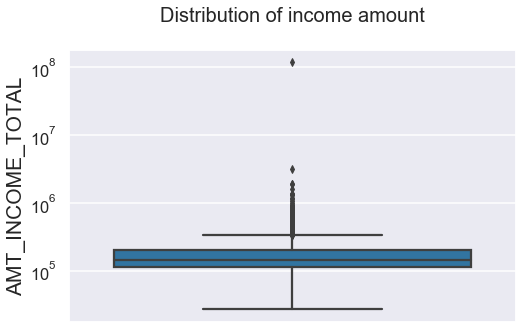

In [41]:
# Distribution of income amount

uni_num(data=Tar1_app_data,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

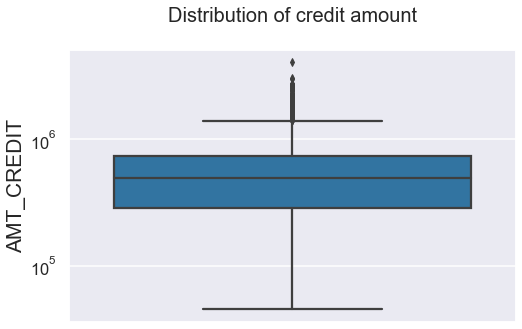

In [42]:
# Distribution of credit amount

uni_num(data=Tar1_app_data,col='AMT_CREDIT',title='Distribution of credit amount')

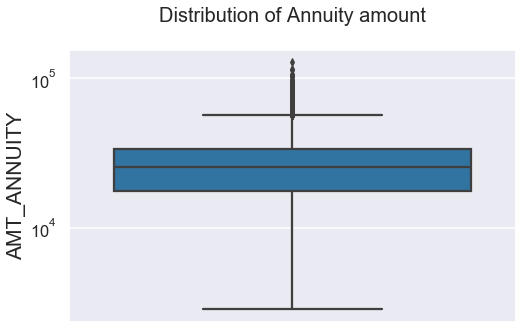

In [43]:
# Distribution of Annuity amount

uni_num(data=Tar1_app_data,col='AMT_ANNUITY',title='Distribution of Annuity amount')

**Few points can be concluded from the boxplots above.**

In all of the above boxplots there were some outliers which can be seen as it is outside of both the IQR(inter quartile range)

**Now we will perform Bivariate Analysis for numerical variables**

**FIRST WE WILL PERFORM FOR TARGET - 0** 

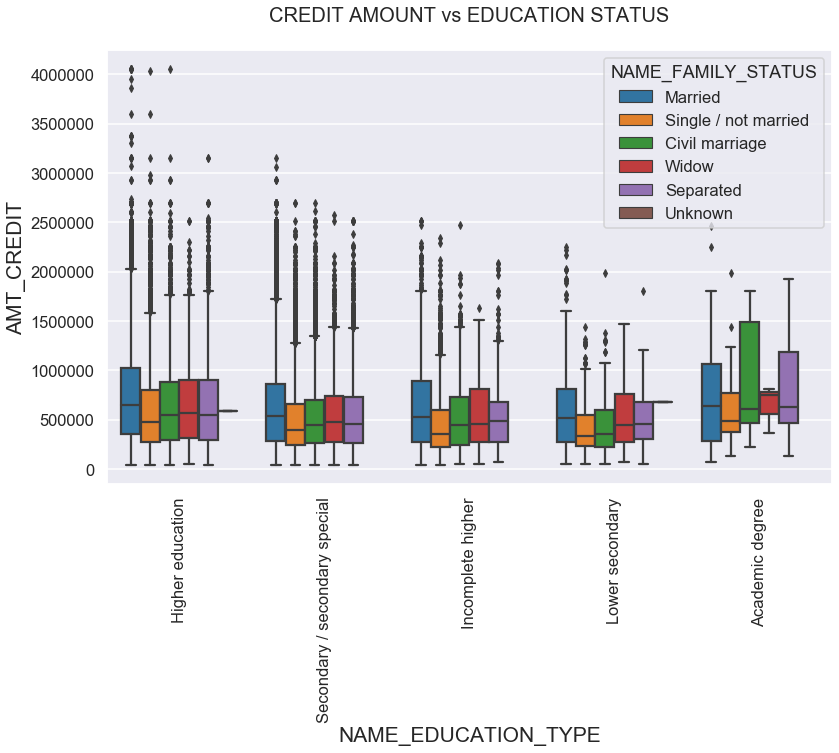

In [44]:
# Box plotting for Credit amount

plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
sns.boxplot(data =Tar0_app_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('CREDIT AMOUNT vs EDUCATION STATUS')
plt.show()

*From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.Civil marriage for Academic degree is having most of the credits in the third quartile.*

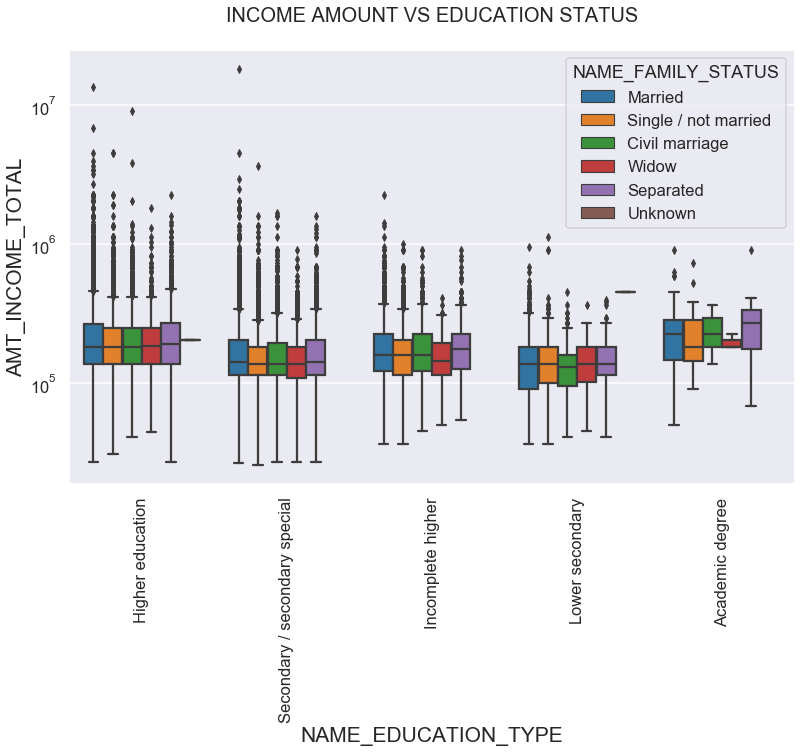

In [45]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Tar0_app_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('INCOME AMOUNT VS EDUCATION STATUS')
plt.show()

*From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.*

**NOW WE WILL PERFORM FOR TARGET - 1**

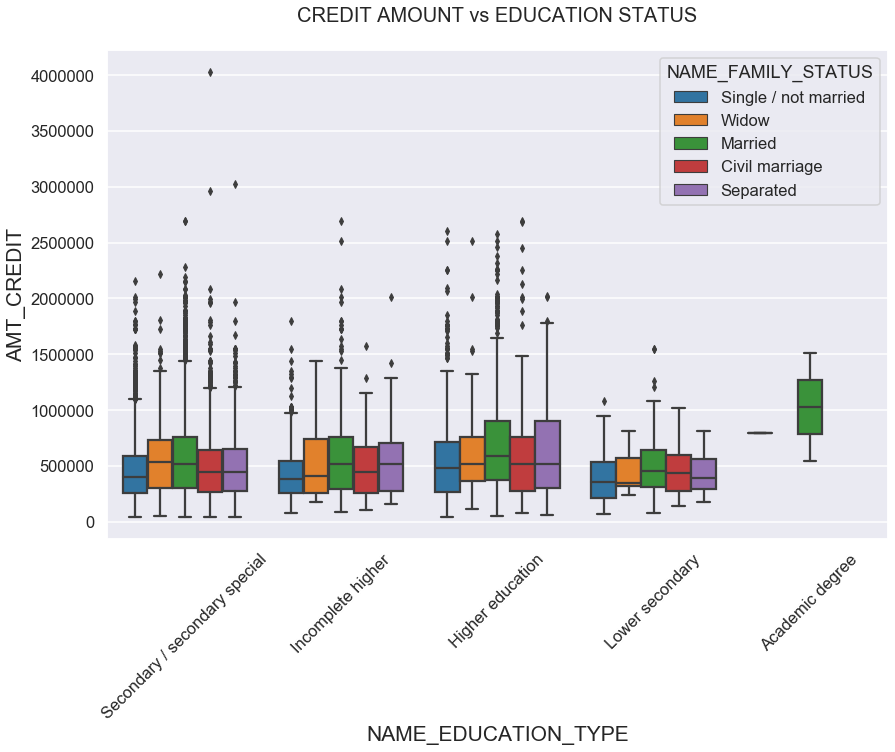

In [46]:
# Box plotting for credit amount

plt.figure(figsize=(14,9))
plt.xticks(rotation=45)
sns.boxplot(data =Tar1_app_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('CREDIT AMOUNT vs EDUCATION STATUS')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others

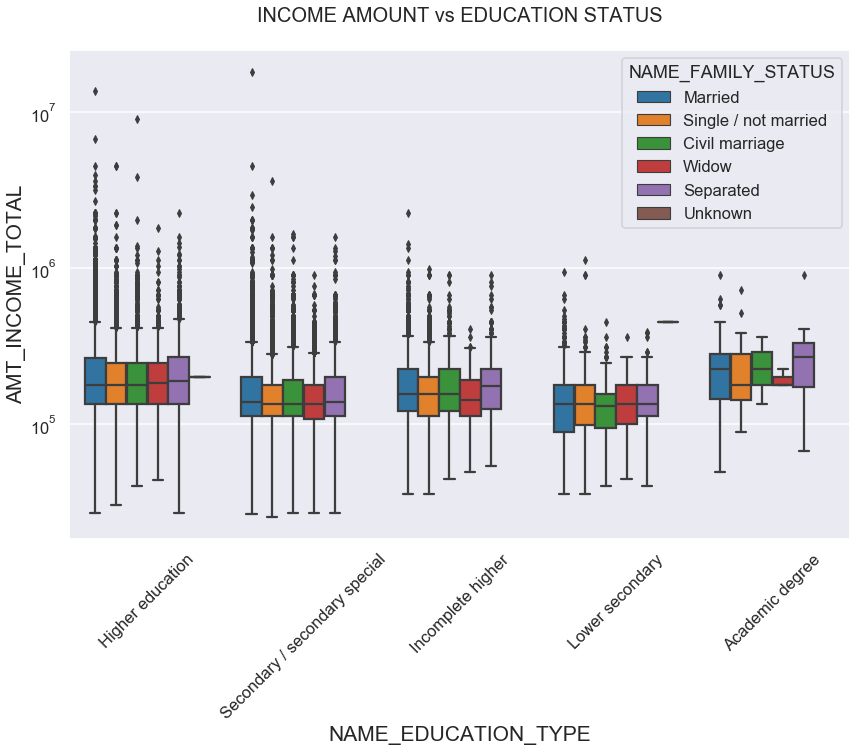

In [47]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(14,9))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =Tar0_app_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('INCOME AMOUNT vs EDUCATION STATUS')
plt.show()

*Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.*

**NOW WE WILL TAKE ANOTHER DATASET** 

In [48]:
app_data1=pd.read_csv("previous_application.csv")
app_data1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [49]:
# Cleaning the missing data

# listing the null values columns having more than 30%

barecol1=app_data1.isnull().sum()
barecol1=barecol1[barecol1.values>(0.3*len(barecol1))]
len(barecol1)

15

In [50]:
# Removing those 15 columns

barecol1 = list(barecol1[barecol1.values>=0.3].index)
app_data1.drop(labels=barecol1,axis=1,inplace=True)
app_data1.shape

(1670214, 22)

In [51]:
# Removing the column values of 'XNA' and 'XAP'

app_data1=app_data1.drop(app_data1[app_data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
app_data1=app_data1.drop(app_data1[app_data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
app_data1=app_data1.drop(app_data1[app_data1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

app_data1.shape

(69635, 22)

In [52]:
# Now merging the Application dataset with previous appliaction dataset

New_Data=pd.merge(left=app_data,right=app_data1,how='inner',on='SK_ID_CURR',suffixes='_x')
New_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [53]:
# Renaming the column names after merging

New_Data1 = New_Data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [54]:
New_Data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [55]:
# Removing unwanted columns for analysis

New_Data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**NOW WE WILL PERFORM UNIVARIATE ANALYSIS**

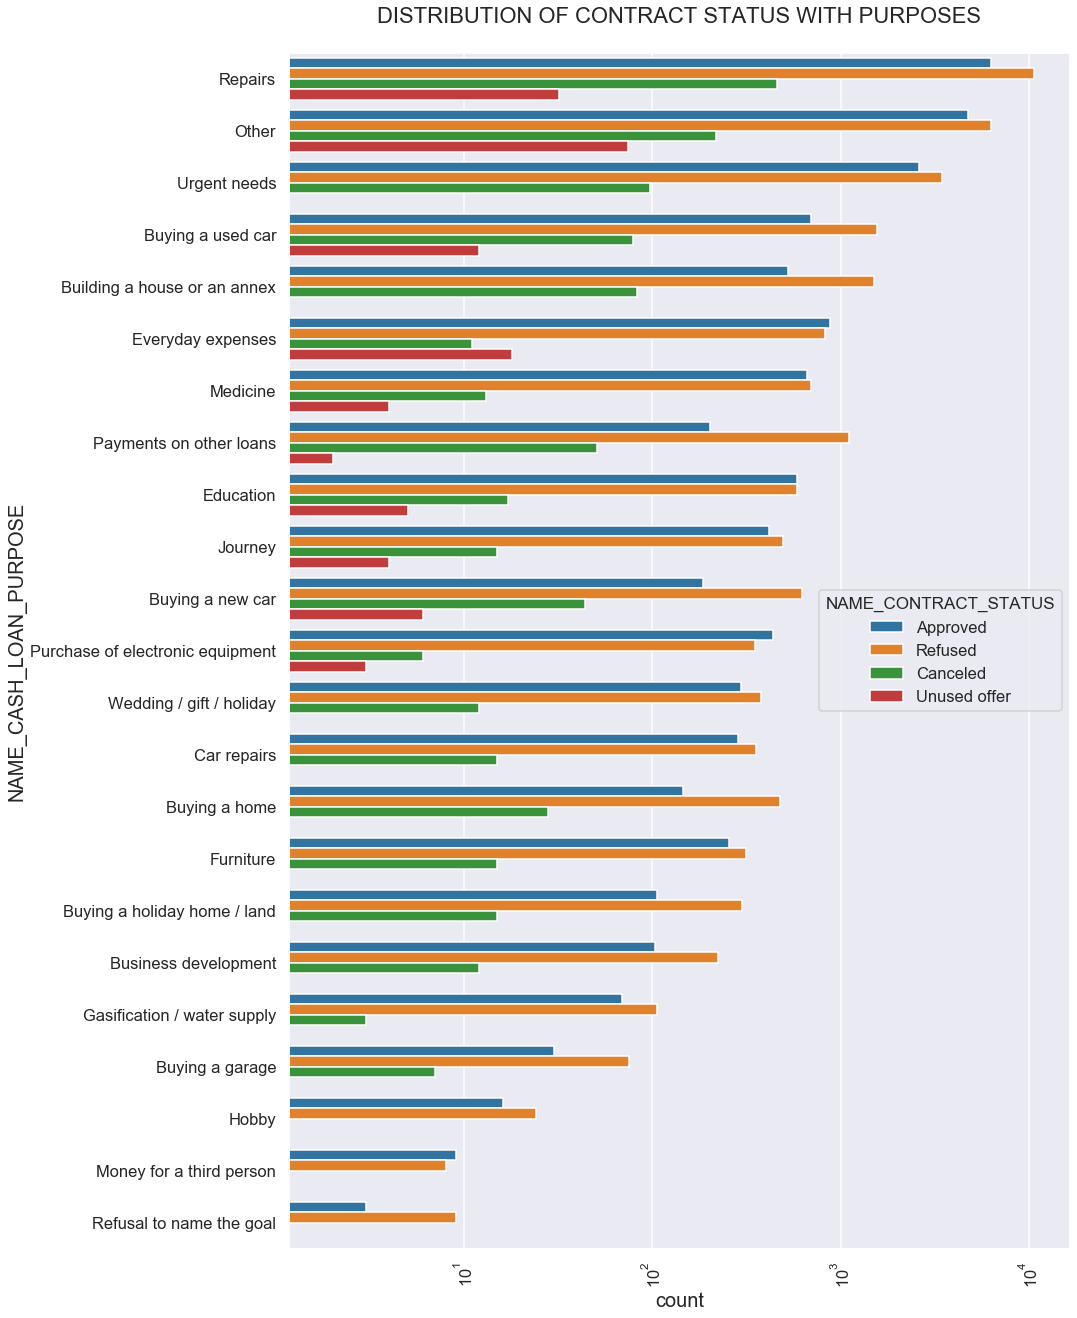

In [56]:
# Distribution of contract status in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(14,22))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('DISTRIBUTION OF CONTRACT STATUS WITH PURPOSES')
ax = sns.countplot(data = New_Data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=New_Data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='tab10') 

**Points to be concluded from above plot:**

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payment of other loans and buying a new car is having significant higher rejection than approves.

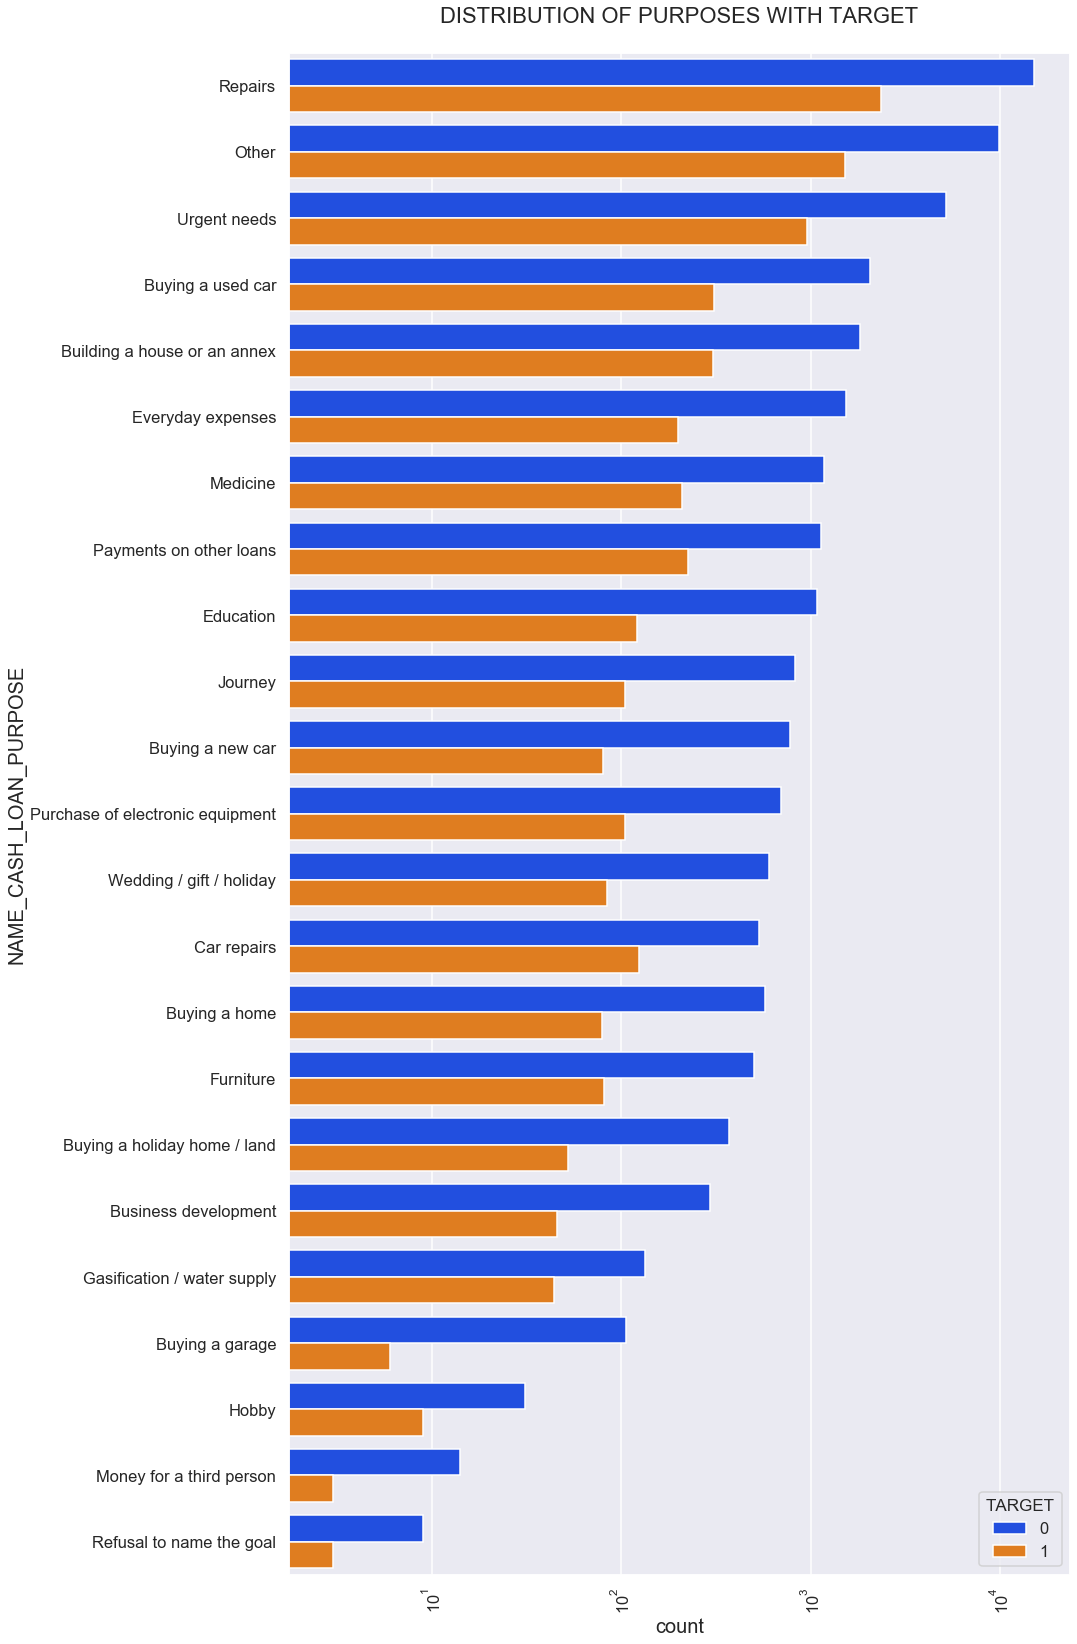

In [57]:
# Distribution of contract status

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(14,28))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title("DISTRIBUTION OF PURPOSES WITH TARGET")
ax = sns.countplot(data = New_Data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=New_Data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='bright') 

**Few points we can conclude from abpve plot:**

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'.
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**NOW WE WILL PERFORM BIVARIATE ANALYSIS**

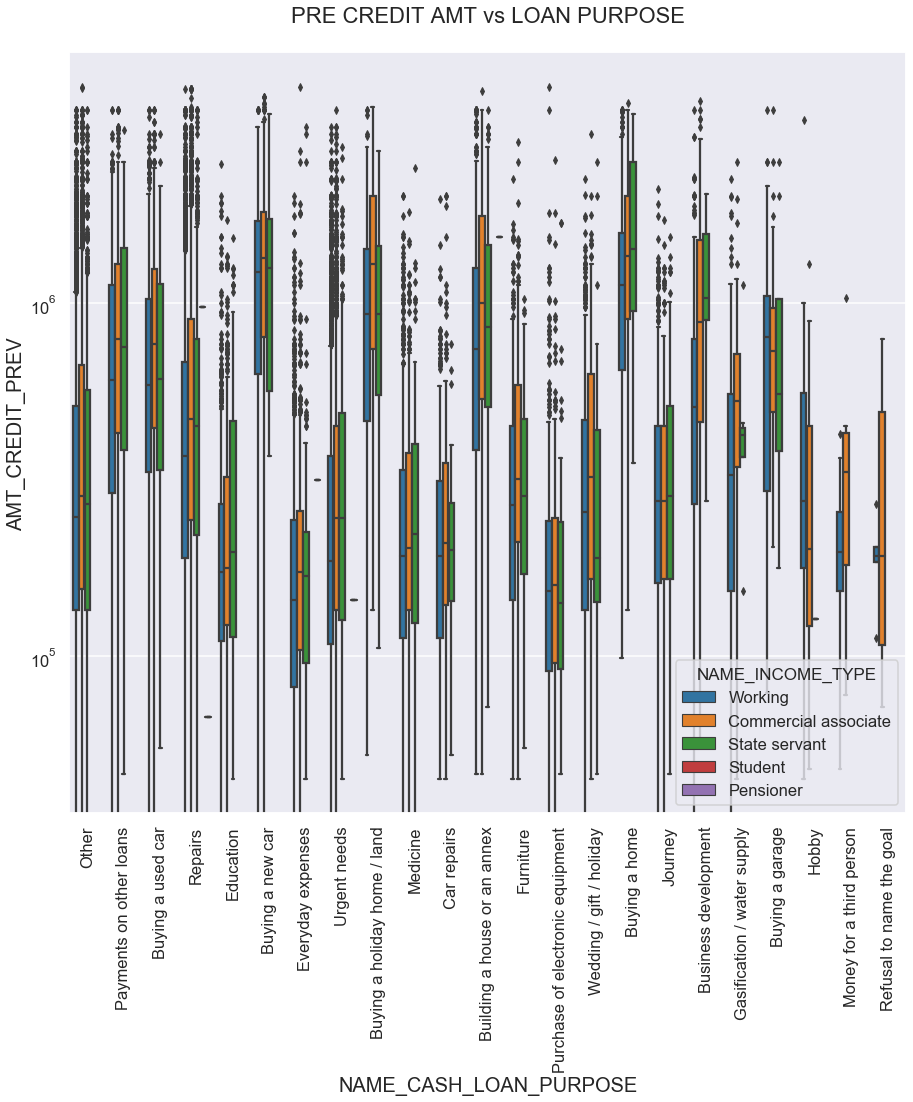

In [58]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(15,14))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =New_Data1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('PRE CREDIT AMT vs LOAN PURPOSE')
plt.show()

**From the above we can conclude some points-**

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

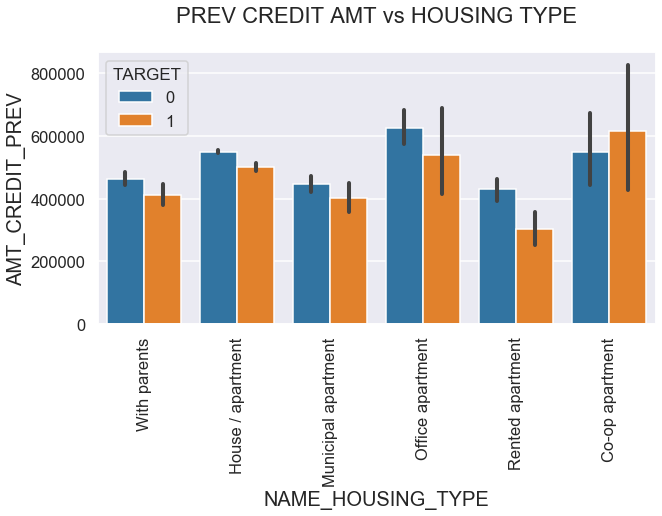

In [59]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data =New_Data1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('PREV CREDIT AMT vs HOUSING TYPE')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.


## CONCLUSION

**1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.**

**2.Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.**

**3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**


**With the above subtask, my project has been is over. We can also perform some other analysis in it but till now it is very intelligible..**